In [9]:
import glob
import os
import pretty_midi

In [15]:
	
# Uncomment to install dependecies to run on Colab:
#!sudo apt-get install fluidsynth
#!pip install pretty_midi mir_eval pyfluidsynth

# For Python2.6 compatibility
from __future__ import print_function

import pretty_midi
import numpy as np
# For plotting
import mir_eval.display
import librosa.display
import matplotlib.pyplot as plt
%matplotlib inline
# For putting audio in the notebook
import IPython.display

In [16]:
midi_files = glob.glob(os.path.join('Dataset-RAW', '*'))

In [17]:
midi_files[0]

'Dataset-RAW/Carol_of_the_Bells_four-hands_piano.mid'

In [18]:
test = midi_files[0]

In [19]:
# Load MIDI file into PrettyMIDI object
midi_data = pretty_midi.PrettyMIDI(test)
# Print an empirical estimate of its global tempo
print(midi_data.estimate_tempo())
# Compute the relative amount of each semitone across the entire song,
# a proxy for key
total_velocity = sum(sum(midi_data.get_chroma()))
print ([sum(semitone)/total_velocity for semitone in midi_data.get_chroma()])
# Shift all notes up by 5 semitones
for instrument in midi_data.instruments:
    # Don't want to shift drum notes
    if not instrument.is_drum:
        for note in instrument.notes:
            note.pitch += 5
# Synthesize the resulting MIDI data using sine waves
audio_data = midi_data.synthesize()

/Users/mattiacarolo/.pyenv/versions/3.9.6/envs/Music/lib/python3.9/site-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


179.36132062297222
[0.07126685263989183, 0.0, 0.19643871689837566, 0.08722927828374363, 0.0042554158546909, 0.12446168137218697, 0.01843776809403958, 0.2527768150854208, 0.004619384583918051, 0.0719308736385794, 0.1652084244734704, 0.00337478907568277]


/var/folders/f6/8tvg8t2s63x9ljzqgvcb66600000gn/T/ipykernel_13537/1581638219.py:3: UserWarning: Frequency axis exceeds Nyquist. Did you remember to set all spectrogram parameters in specshow?
  librosa.display.specshow(pm.get_piano_roll(fs)[start_pitch:end_pitch],


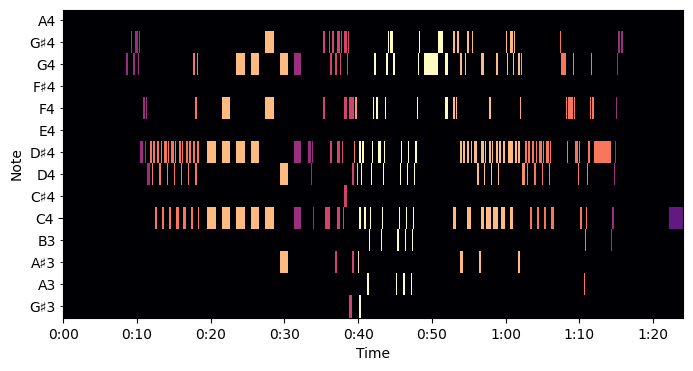

In [20]:
def plot_piano_roll(pm, start_pitch, end_pitch, fs=100):
    # Use librosa's specshow function for displaying the piano roll
    librosa.display.specshow(pm.get_piano_roll(fs)[start_pitch:end_pitch],
                             hop_length=1, sr=fs, x_axis='time', y_axis='cqt_note',
                             fmin=pretty_midi.note_number_to_hz(start_pitch))

plt.figure(figsize=(8, 4))
plot_piano_roll(midi_data, 56, 70)

In [22]:
fs = 16000
IPython.display.Audio(midi_data.synthesize(fs=16000), rate=16000)